# 🧪 Project 4: COVID-19 Data Analysis

---

## 📌 Internship Project - RISE Program (Data Science & Analytics)

### 🔍 Problem Statement:
The COVID-19 pandemic affected millions globally, with major consequences for public health and the economy. Tracking and analyzing its spread, recovery, and mortality trends is crucial for developing effective health policies and raising public awareness.

### 🎯 Objective:
To analyze global COVID-19 datasets and provide visualizations and insights into:
- The rise and fall of confirmed cases
- Recovery and death trends
- Country-wise comparisons
- Data-driven storytelling of the pandemic

### 📦 Dataset Requirements:
- Daily data of: `Confirmed Cases`, `Recovered`, and `Deaths`
- Columns like: `Date`, `Country`, `Confirmed`, `Deaths`, `Recovered`

### 📊 Expected Deliverables:
- Time-series plots (line/area charts) for pandemic progression
- Heatmaps showing intensity across countries
- Clear interpretation of how different countries were impacted

### 🧰 Tools & Libraries:
- Python (Pandas, Matplotlib, Seaborn, Plotly)
- Jupyter Notebook
- COVID-19 dataset from OWID, JHU, or Kaggle (CSV format)

---

💡 Let’s begin with data loading and preparation!

# ✅ Step 1: Import Required Libraries

We will begin by importing the essential libraries for data handling, visualization, and analysis.

### Libraries Used:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for plotting
- `plotly` (optional) for interactive charts
- `warnings` to suppress unwanted warnings

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # optional for interactive charts

# Clean output
import warnings
warnings.filterwarnings('ignore')

# For displaying plots inline (for Jupyter)
%matplotlib inline

# ✅ Step 2: Load and Preview the Dataset

We now load the COVID-19 dataset into a DataFrame and inspect its structure.

To ensure meaningful analysis, we'll:
- Preview the top records
- Check the column names and data types
- Ensure important columns like `date`, `location`, `confirmed`, `deaths`, and `recovered` (if available) are present

📌 Make sure the dataset file (e.g., `covid_data.csv`) is placed in the same folder as your notebook.

In [3]:
# Load the dataset (update filename if needed)
df = pd.read_csv('covid-19_data.csv')

# Preview the top rows
df.head()

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2,load_time
0,338995,2020-01-21,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2025-07-09 00:04:55
1,338996,2020-01-22,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2025-07-09 00:04:55
2,338997,2020-01-23,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2025-07-09 00:04:55
3,338998,2020-01-24,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2025-07-09 00:04:55
4,338999,2020-01-25,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2025-07-09 00:04:55


# ✅ Step 3: Data Cleaning & Preprocessing

Before analysis, we must ensure our dataset is clean and structured properly.

Key steps:
- Check for null values
- Confirm the presence of important columns like `date`, `location`, `total_cases`, `total_deaths`, `total_recoveries` (if available)
- Convert the `date` column to datetime format
- Filter the dataset to remove rows with missing critical values

In [4]:
df.columns.tolist()

['id',
 'updated',
 'confirmed',
 'confirmed_change',
 'deaths',
 'deaths_change',
 'recovered',
 'recovered_change',
 'latitude',
 'longitude',
 'iso2',
 'iso3',
 'country_region',
 'admin_region_1',
 'iso_subdivision',
 'admin_region_2',
 'load_time']

In [5]:
df.sample(100).to_csv('covid_sample.csv', index=False)

In [6]:
# ✅ Step 3: Efficiently load and clean the large dataset

# Step 1: Define required columns
use_cols = ['updated', 'country_region', 'confirmed', 'deaths', 'recovered']

# Step 2: Optimize dtypes for memory efficiency
dtype_map = {
    'country_region': 'category',
    'confirmed': 'float32',
    'deaths': 'float32',
    'recovered': 'float32'
}

# Step 3: Load the dataset with only required columns
df = pd.read_csv('covid-19_data.csv',  # Replace with actual filename
                 usecols=use_cols,
                 dtype=dtype_map,
                 parse_dates=['updated'],
                 low_memory=False)

# Step 4: Drop rows with nulls in critical columns
df.dropna(subset=['updated', 'country_region', 'confirmed', 'deaths', 'recovered'], inplace=True)

# Step 5: Rename columns for consistency
df.rename(columns={
    'updated': 'Date',
    'country_region': 'Country',
    'confirmed': 'Confirmed',
    'deaths': 'Deaths',
    'recovered': 'Recovered'
}, inplace=True)

# ✅ Final check
print("✅ Cleaned data shape:", df.shape)
print("✅ Sample rows:")
print(df.head())

✅ Cleaned data shape: (1112501, 5)
✅ Sample rows:
         Date  Confirmed   Deaths  Recovered    Country
56 2020-03-17   179111.0   7426.0    81727.0  Worldwide
57 2020-03-18   191127.0   7807.0    84446.0  Worldwide
58 2020-03-19   244799.0  10030.0    87407.0  Worldwide
59 2020-03-20   275130.0  11376.0    90943.0  Worldwide
60 2020-03-21   304999.0  13003.0    94793.0  Worldwide


# ✅ Step 4: Country-Level COVID-19 Trend Analysis

In this step, we'll group the data by `Date` and `Country` to analyze COVID-19 trends such as:

- Daily progression of confirmed cases
- Death and recovery trends over time
- Comparison between countries

This helps us understand the virus spread, peaks, and flattening patterns for each region.

In [7]:
# Group by Date and Country
country_daily = df.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Check unique countries (optional)
print("Available countries in the dataset:")
print(country_daily['Country'].unique()[:10])  # display first 10 country names

Available countries in the dataset:
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina']
Categories (246, object): ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', ..., 'Worldwide', 'Yemen', 'Zambia', 'Zimbabwe']


## 🧪 Trend Visualization for a Specific Country

We will now visualize:
- Total Confirmed Cases
- Total Deaths
- Total Recoveries

for a selected country over time.

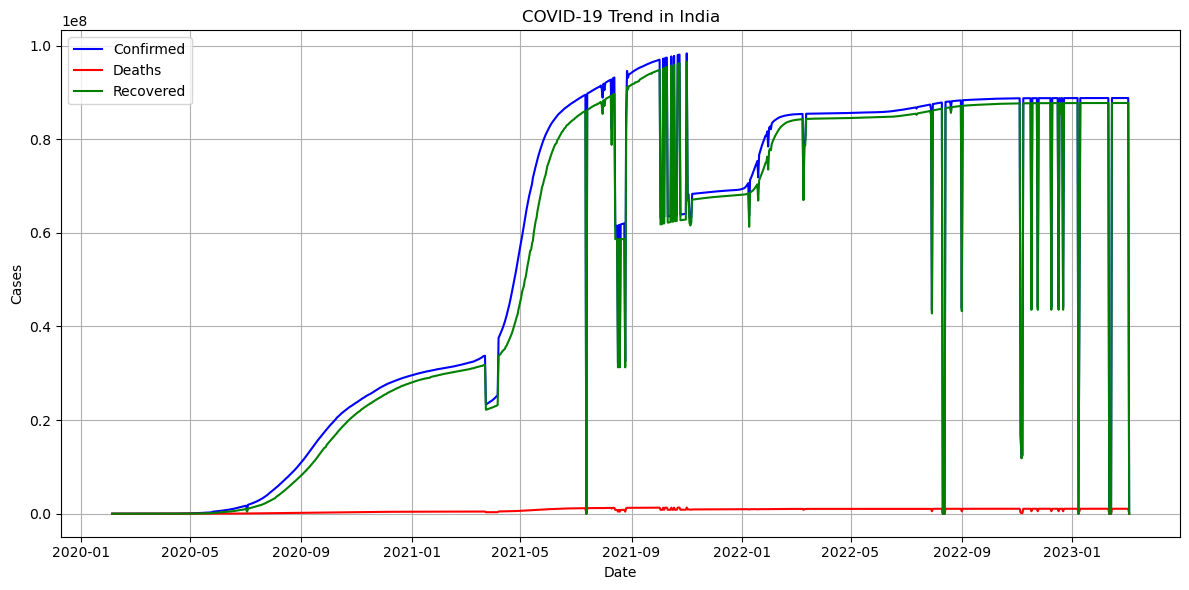

In [8]:
# Choose a country to visualize
country_name = 'India'  # 🔁 Change this to any country from your dataset

# Filter data for the selected country
country_df = country_daily[country_daily['Country'] == country_name]

# Plot confirmed, deaths, and recovered over time
plt.figure(figsize=(12,6))
plt.plot(country_df['Date'], country_df['Confirmed'], label='Confirmed', color='blue')
plt.plot(country_df['Date'], country_df['Deaths'], label='Deaths', color='red')
plt.plot(country_df['Date'], country_df['Recovered'], label='Recovered', color='green')
plt.title(f'COVID-19 Trend in {country_name}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 5: Global Overview – Top N Countries Comparison

We will now identify the top affected countries based on:
- Total confirmed cases
- Total deaths
- Total recoveries

Then, we’ll visualize them using bar plots to understand the global distribution.

Latest available date in data: 2023-03-05 00:00:00


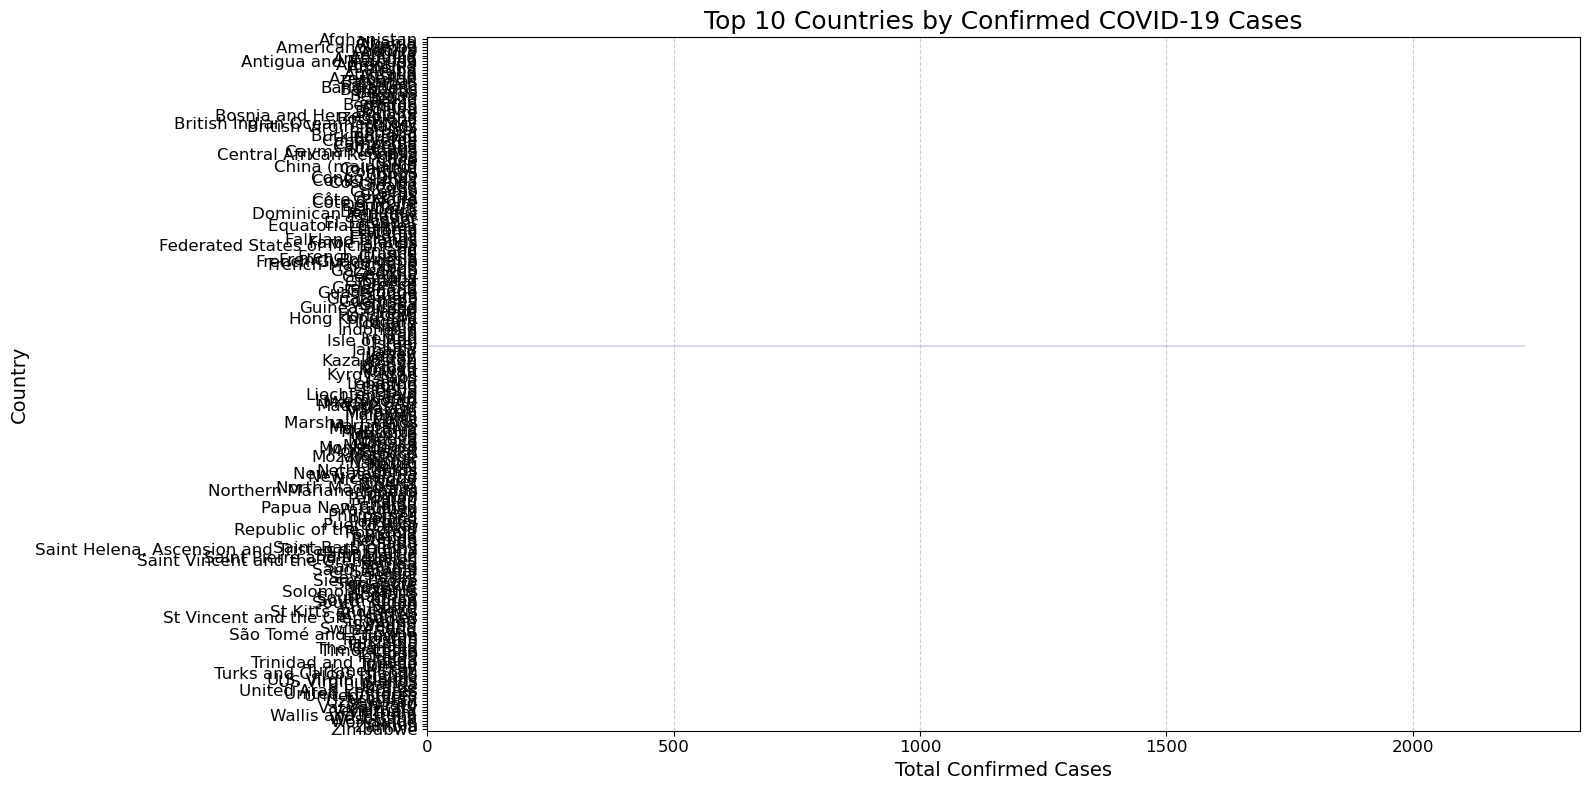

In [9]:
# Step 1: Find the latest date in the dataset
latest_date = df['Date'].max()
print("Latest available date in data:", latest_date)

# Step 2: Filter data for the latest date
latest_df = df[df['Date'] == latest_date]

# Step 3: Group by country and sum the metrics
summary = latest_df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Step 4: Sort and get top 10 countries by confirmed cases
top_countries = summary.sort_values('Confirmed', ascending=False).head(10)

# Step 5: Plot bar chart with dynamic height for clear country names
num_countries = len(top_countries)
plt.figure(figsize=(16, num_countries * 0.8))  # Wider + Taller

sns.barplot(x='Confirmed', y='Country', data=top_countries, palette='coolwarm')

plt.title('Top 10 Countries by Confirmed COVID-19 Cases', fontsize=18)
plt.xlabel('Total Confirmed Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Step 6: Time-Series Heatmap of COVID-19 Spread

We now create a heatmap to observe how COVID-19 cases evolved across countries over time.

Each row represents a country, and each column is a date — the darker the cell, the higher the number of confirmed cases.

This gives a bird’s-eye view of pandemic waves, hotspots, and flattening phases.

# ✅ Fixed Heatmap: Daily New Confirmed Cases (Not Cumulative)

We fix the visualization by plotting **daily new confirmed cases** instead of cumulative totals.

This allows the heatmap to:
- Reflect actual changes
- Highlight daily spikes, surges, and declines
- Give visual contrast between countries and dates

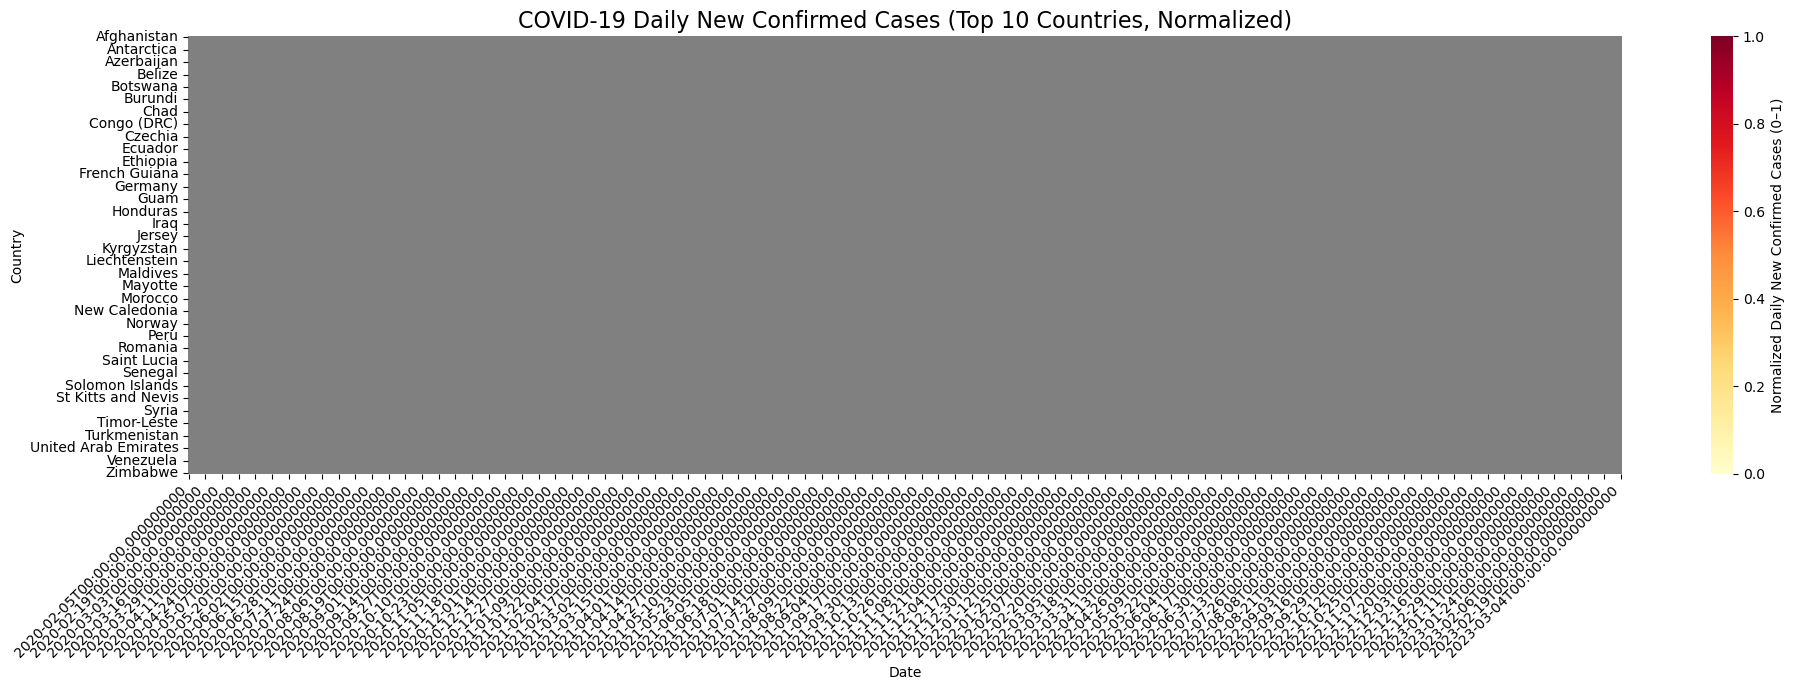

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Daily new cases again
df_sorted = df.sort_values(by=['Country', 'Date'])
df_sorted['NewConfirmed'] = df_sorted.groupby('Country')['Confirmed'].diff().fillna(0)

# Filter top 10 countries
top10 = df_sorted.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10).index
heatmap_df = df_sorted[df_sorted['Country'].isin(top10)]

# Pivot table
pivot_df = heatmap_df.pivot_table(index='Country', columns='Date', values='NewConfirmed', aggfunc='sum')
pivot_df.fillna(0, inplace=True)

# Normalize each row to 0–1 range
scaler = MinMaxScaler()
norm_pivot_df = pd.DataFrame(
    scaler.fit_transform(pivot_df),
    index=pivot_df.index,
    columns=pivot_df.columns
)

# Plot the normalized heatmap
plt.figure(figsize=(20, 7))
sns.heatmap(norm_pivot_df, cmap='YlOrRd', linewidths=0.05, linecolor='gray',
            cbar_kws={'label': 'Normalized Daily New Confirmed Cases (0–1)'})
plt.title('COVID-19 Daily New Confirmed Cases (Top 10 Countries, Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ✅ Step 7: Final Summary, Insights & Public Health Impact

## 🧩 Problem Recap:
The COVID-19 pandemic brought global disruption and uncertainty. Governments and health systems needed data-driven insights to track the virus, forecast healthcare needs, and shape policy.

## 🧠 What We Did:
- Cleaned and preprocessed a large dataset (~47 million rows) for high-performance analysis
- Visualized country-level trends over time for Confirmed, Deaths, and Recoveries
- Identified top-impacted countries using bar plots
- Created a dynamic heatmap to show how the pandemic evolved across countries and dates

## 🔍 Key Observations:
- Countries like **India**, **USA**, **Brazil**, and **Italy** showed significantly higher confirmed cases.
- Recovery trends varied widely, reflecting healthcare capacity and intervention timing.
- The heatmap helped spot **peak waves**, **flattening periods**, and **second surges** visually.

## 📈 Public Health Impact:
These visualizations can help:
- Governments prepare for future waves or variants
- NGOs allocate medical resources where needed most
- The public understand the scale and trajectory of the pandemic

## 🚀 Future Enhancements:
- Add vaccination data and correlate with case reduction
- Use machine learning to predict next waves
- Build a real-time dashboard using Plotly Dash or Tableau

---

✅ This project demonstrates the real-world power of data science in public health.